# Neural Networks for MNIST dataset

## Loading data

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.datasets import mnist

Using Theano backend.


In [2]:
seed = 7
np.random.seed(seed)

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
%matplotlib inline

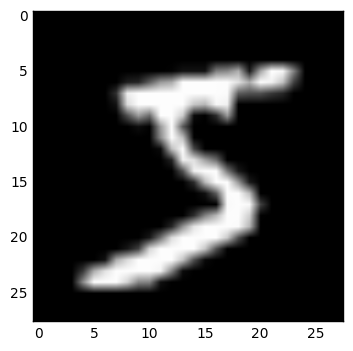

5


In [7]:
import pylab as plt
plt.imshow(X_train[0], cmap='gray')
plt.show()
print(Y_train[0])

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

In [11]:
print(Y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


## Simple 2- layer NN

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [13]:
# for the number of neurons in the hidden unit
M = 300
model1 = Sequential()
model1.add(Dense(M, input_dim=num_pixels, init='normal', activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [15]:
# default learning rate
print(model1.optimizer.lr.get_value())
model1.optimizer.lr.set_value(0.0001)  # [1, 0.1, 0.01, 0.001, 0.0001, 0.00001] #recompile first!
print(model1.optimizer.lr.get_value())

1.0
9.99999974738e-05


In [16]:
model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=1, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model1.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
6s - loss: 0.9650 - acc: 0.7702 - val_loss: 0.4564 - val_acc: 0.8939
Baseline Error: 10.61%


In [17]:
def get_model(lr=0.001, M=300):
    model = Sequential()
    model.add(Dense(M, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
    model.optimizer.lr.set_value(lr)
    return model

In [46]:
model2 = get_model(lr=.01, M=2000) # [10, 50, 100, 300, 1000, 2000] #
model2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_31 (Dense)                 (None, 2000)          1570000     dense_input_16[0][0]             
____________________________________________________________________________________________________
dense_32 (Dense)                 (None, 10)            20010       dense_31[0][0]                   
Total params: 1590010
____________________________________________________________________________________________________


In [47]:
model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model2.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
37s - loss: 0.4591 - acc: 0.9167 - val_loss: 0.1272 - val_acc: 0.9621
Epoch 2/10
36s - loss: 0.0963 - acc: 0.9705 - val_loss: 0.0911 - val_acc: 0.9731
Epoch 3/10
50s - loss: 0.0771 - acc: 0.9758 - val_loss: 0.1057 - val_acc: 0.9697
Epoch 4/10
51s - loss: 0.0664 - acc: 0.9800 - val_loss: 0.1131 - val_acc: 0.9715
Epoch 5/10
51s - loss: 0.0593 - acc: 0.9828 - val_loss: 0.1142 - val_acc: 0.9713
Epoch 6/10
51s - loss: 0.0578 - acc: 0.9834 - val_loss: 0.1331 - val_acc: 0.9682
Epoch 7/10
52s - loss: 0.0513 - acc: 0.9856 - val_loss: 0.1422 - val_acc: 0.9719
Epoch 8/10
55s - loss: 0.0529 - acc: 0.9861 - val_loss: 0.1299 - val_acc: 0.9738
Epoch 9/10
58s - loss: 0.0479 - acc: 0.9873 - val_loss: 0.1465 - val_acc: 0.9726
Epoch 10/10
58s - loss: 0.0476 - acc: 0.9877 - val_loss: 0.1522 - val_acc: 0.9726
Baseline Error: 2.74%


## Models with L2 regularization

In [48]:
from keras.regularizers import l2

In [49]:
def get_reg_model(lr=0.001, M=300, w=0.1):
    model = Sequential()
    model.add(Dense(M, input_dim=num_pixels, init='normal', activation='relu', W_regularizer=l2(w)))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
    model.optimizer.lr.set_value(lr)
    return model

In [77]:
model0 = get_reg_model(lr=.01, M=300, w=0)
model0.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_54 (Dense)                 (None, 300)           235500      dense_input_27[0][0]             
____________________________________________________________________________________________________
dense_55 (Dense)                 (None, 10)            3010        dense_54[0][0]                   
Total params: 238510
____________________________________________________________________________________________________


In [78]:
model0.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=10, batch_size=200, verbose=2)
scores = model0.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
6s - loss: 0.2118 - acc: 0.9351 - val_loss: 0.1296 - val_acc: 0.9583
Epoch 2/10
6s - loss: 0.0949 - acc: 0.9706 - val_loss: 0.1004 - val_acc: 0.9706
Epoch 3/10
6s - loss: 0.0690 - acc: 0.9785 - val_loss: 0.1068 - val_acc: 0.9716
Epoch 4/10
7s - loss: 0.0656 - acc: 0.9803 - val_loss: 0.0999 - val_acc: 0.9732
Epoch 5/10
7s - loss: 0.0501 - acc: 0.9847 - val_loss: 0.0948 - val_acc: 0.9756
Epoch 6/10
6s - loss: 0.0514 - acc: 0.9838 - val_loss: 0.1550 - val_acc: 0.9687
Epoch 7/10
7s - loss: 0.0548 - acc: 0.9837 - val_loss: 0.1469 - val_acc: 0.9693
Epoch 8/10
7s - loss: 0.0506 - acc: 0.9861 - val_loss: 0.1429 - val_acc: 0.9747
Epoch 9/10
7s - loss: 0.0397 - acc: 0.9883 - val_loss: 0.1271 - val_acc: 0.9746
Epoch 10/10
7s - loss: 0.0392 - acc: 0.9888 - val_loss: 0.1282 - val_acc: 0.9766
Baseline Error: 2.34%


In [79]:
model0.optimizer.lr.set_value(0.001)
model0.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=10, batch_size=200, verbose=2)
scores = model0.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
7s - loss: 0.0140 - acc: 0.9955 - val_loss: 0.1142 - val_acc: 0.9798
Epoch 2/10
8s - loss: 0.0053 - acc: 0.9984 - val_loss: 0.1118 - val_acc: 0.9800
Epoch 3/10
7s - loss: 0.0033 - acc: 0.9992 - val_loss: 0.1106 - val_acc: 0.9803
Epoch 4/10
7s - loss: 0.0024 - acc: 0.9996 - val_loss: 0.1114 - val_acc: 0.9799
Epoch 5/10
7s - loss: 0.0018 - acc: 0.9997 - val_loss: 0.1114 - val_acc: 0.9804
Epoch 6/10
7s - loss: 0.0015 - acc: 0.9998 - val_loss: 0.1125 - val_acc: 0.9803
Epoch 7/10
7s - loss: 0.0012 - acc: 0.9999 - val_loss: 0.1123 - val_acc: 0.9806
Epoch 8/10
7s - loss: 0.0010 - acc: 0.9999 - val_loss: 0.1134 - val_acc: 0.9807
Epoch 9/10
7s - loss: 9.1122e-04 - acc: 0.9999 - val_loss: 0.1131 - val_acc: 0.9808
Epoch 10/10
7s - loss: 8.0099e-04 - acc: 1.0000 - val_loss: 0.1138 - val_acc: 0.9806
Baseline Error: 1.94%


In [80]:
model0 = get_reg_model(lr=.01, M=300, w=0.002)
model0.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_56 (Dense)                 (None, 300)           235500      dense_input_28[0][0]             
____________________________________________________________________________________________________
dense_57 (Dense)                 (None, 10)            3010        dense_56[0][0]                   
Total params: 238510
____________________________________________________________________________________________________


In [81]:
model0.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=30, batch_size=200, verbose=2)
scores = model0.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
4s - loss: 0.5470 - acc: 0.9119 - val_loss: 0.2027 - val_acc: 0.9386
Epoch 2/30
4s - loss: 0.4045 - acc: 0.9355 - val_loss: 0.1701 - val_acc: 0.9489
Epoch 3/30
5s - loss: 0.3698 - acc: 0.9390 - val_loss: 0.1800 - val_acc: 0.9458
Epoch 4/30
5s - loss: 0.3562 - acc: 0.9416 - val_loss: 0.2346 - val_acc: 0.9275
Epoch 5/30
6s - loss: 0.3324 - acc: 0.9449 - val_loss: 0.1978 - val_acc: 0.9391
Epoch 6/30
23s - loss: 0.3350 - acc: 0.9431 - val_loss: 0.1577 - val_acc: 0.9528
Epoch 7/30
41s - loss: 0.3138 - acc: 0.9463 - val_loss: 0.1739 - val_acc: 0.9461
Epoch 8/30
51s - loss: 0.3173 - acc: 0.9461 - val_loss: 0.1710 - val_acc: 0.9479
Epoch 9/30
55s - loss: 0.3150 - acc: 0.9457 - val_loss: 0.1845 - val_acc: 0.9421
Epoch 10/30
58s - loss: 0.3174 - acc: 0.9444 - val_loss: 0.1567 - val_acc: 0.9529
Epoch 11/30
60s - loss: 0.3033 - acc: 0.9465 - val_loss: 0.1498 - val_acc: 0.9517
Epoch 12/30
62s - loss: 0.3121 - acc: 0.9445 - val_loss: 0.198

## Models with Dropout

In [55]:
def get_dropout_model(lr=0.001, M=300, w=0.2):
    model = Sequential()
    model.add(Dense(M, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dropout(w))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
    model.optimizer.lr.set_value(lr)
    return model

In [106]:
model = get_dropout_model(lr=.001, M=300, w=1) # w = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_82 (Dense)                 (None, 300)           235500      dense_input_41[0][0]             
____________________________________________________________________________________________________
dropout_22 (Dropout)             (None, 300)           0           dense_82[0][0]                   
____________________________________________________________________________________________________
dense_83 (Dense)                 (None, 10)            3010        dropout_22[0][0]                 
Total params: 238510
____________________________________________________________________________________________________


In [107]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=30, batch_size=200, verbose=2)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
6s - loss: 0.3500 - acc: 0.9031 - val_loss: 0.1803 - val_acc: 0.9469
Epoch 2/30
6s - loss: 0.1464 - acc: 0.9581 - val_loss: 0.1205 - val_acc: 0.9633
Epoch 3/30
6s - loss: 0.0996 - acc: 0.9717 - val_loss: 0.0948 - val_acc: 0.9715
Epoch 4/30
6s - loss: 0.0743 - acc: 0.9786 - val_loss: 0.0905 - val_acc: 0.9721
Epoch 5/30
7s - loss: 0.0572 - acc: 0.9838 - val_loss: 0.0803 - val_acc: 0.9752
Epoch 6/30
6s - loss: 0.0466 - acc: 0.9871 - val_loss: 0.0762 - val_acc: 0.9760
Epoch 7/30
6s - loss: 0.0375 - acc: 0.9893 - val_loss: 0.0681 - val_acc: 0.9778
Epoch 8/30
6s - loss: 0.0302 - acc: 0.9918 - val_loss: 0.0692 - val_acc: 0.9788
Epoch 9/30
6s - loss: 0.0240 - acc: 0.9941 - val_loss: 0.0642 - val_acc: 0.9795
Epoch 10/30
5s - loss: 0.0192 - acc: 0.9957 - val_loss: 0.0616 - val_acc: 0.9805
Epoch 11/30
6s - loss: 0.0155 - acc: 0.9971 - val_loss: 0.0674 - val_acc: 0.9786
Epoch 12/30
5s - loss: 0.0127 - acc: 0.9976 - val_loss: 0.0664 - val

# 3-layer NN

In [108]:
def get_3nn_model(lr=0.001, M1=300, w1=0.2, M2=240, w2=0.2, reg=0.002):
    model = Sequential()
    model.add(Dense(M1, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dropout(w1))
    model.add(Dense(M2, input_dim=num_pixels, activation='relu', W_regularizer=l2(reg)))
    model.add(Dropout(w2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
    model.optimizer.lr.set_value(lr)
    return model

In [109]:
model = get_3nn_model(lr=.001, M1=500, w1=0.4, M2=500, w2=0.4, reg=0.002)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_84 (Dense)                 (None, 500)           392500      dense_input_42[0][0]             
____________________________________________________________________________________________________
dropout_23 (Dropout)             (None, 500)           0           dense_84[0][0]                   
____________________________________________________________________________________________________
dense_85 (Dense)                 (None, 500)           250500      dropout_23[0][0]                 
____________________________________________________________________________________________________
dropout_24 (Dropout)             (None, 500)           0           dense_85[0][0]                   
___________________________________________________________________________________________

In [110]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
20s - loss: 0.7975 - acc: 0.8933 - val_loss: 0.1392 - val_acc: 0.9582
Epoch 2/10
18s - loss: 0.2771 - acc: 0.9518 - val_loss: 0.1064 - val_acc: 0.9658
Epoch 3/10
19s - loss: 0.1991 - acc: 0.9606 - val_loss: 0.0927 - val_acc: 0.9718
Epoch 4/10
19s - loss: 0.1704 - acc: 0.9674 - val_loss: 0.0898 - val_acc: 0.9724
Epoch 5/10
20s - loss: 0.1603 - acc: 0.9700 - val_loss: 0.0762 - val_acc: 0.9770
Epoch 6/10
21s - loss: 0.1484 - acc: 0.9726 - val_loss: 0.0814 - val_acc: 0.9741
Epoch 7/10
22s - loss: 0.1409 - acc: 0.9753 - val_loss: 0.0678 - val_acc: 0.9793
Epoch 8/10
23s - loss: 0.1320 - acc: 0.9777 - val_loss: 0.0708 - val_acc: 0.9791
Epoch 9/10
23s - loss: 0.1288 - acc: 0.9772 - val_loss: 0.0701 - val_acc: 0.9785
Epoch 10/10
24s - loss: 0.1217 - acc: 0.9793 - val_loss: 0.0701 - val_acc: 0.9784
Baseline Error: 2.16%


In [111]:
model.optimizer.lr.set_value(0.0001)

In [112]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
24s - loss: 0.0952 - acc: 0.9870 - val_loss: 0.0553 - val_acc: 0.9830
Epoch 2/10
23s - loss: 0.0793 - acc: 0.9892 - val_loss: 0.0532 - val_acc: 0.9833
Epoch 3/10
23s - loss: 0.0719 - acc: 0.9895 - val_loss: 0.0525 - val_acc: 0.9834
Epoch 4/10
24s - loss: 0.0654 - acc: 0.9898 - val_loss: 0.0529 - val_acc: 0.9836
Epoch 5/10
23s - loss: 0.0612 - acc: 0.9902 - val_loss: 0.0518 - val_acc: 0.9841
Epoch 6/10
27s - loss: 0.0591 - acc: 0.9898 - val_loss: 0.0521 - val_acc: 0.9839
Epoch 7/10
28s - loss: 0.0565 - acc: 0.9903 - val_loss: 0.0526 - val_acc: 0.9835
Epoch 8/10
27s - loss: 0.0546 - acc: 0.9905 - val_loss: 0.0519 - val_acc: 0.9841
Epoch 9/10
28s - loss: 0.0537 - acc: 0.9904 - val_loss: 0.0534 - val_acc: 0.9841
Epoch 10/10
28s - loss: 0.0538 - acc: 0.9905 - val_loss: 0.0524 - val_acc: 0.9831
Baseline Error: 1.69%
